In [19]:
from __future__ import division
from matplotlib import pyplot as plt
import random
import numpy as np
import time
import pandas as pd
import math

In [36]:
# Read data from csv
data = pd.read_csv("./data/ackley.csv")
ackley = data['fvalue'].tolist()
#print(sphere)
#sphere[1]

bias = -140
D = 50# Dimension
lower_bound = -32
upper_bound =  32


def cost_function(x, dim=D):
    Sum1 = 0
    Sum2 = 0
    for i in range(dim - 1) :
        z = x[i] - ackley[i]
        Sum1 += z ** 2
        Sum2 += math.cos (2 * math.pi * z)
        res = -20 * math.exp (-0.2 * math.sqrt (Sum1 / dim)) - math.exp (Sum2 /dim) + 20 + math.e + bias
    return res

In [37]:
# Shifted Sphere Function: Dimension 50
# Particle Swarm Optimization

start_time = time.time() # evaluate computational time

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])
            
    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i        
            
    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5      # constant inertia weight (how much to weigh the previous velocity)
        c1=2     # cognative constant
        c2=1     # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social
            
    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]            

                
def PSO(costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions    

    
    num_dimensions = len(x0)
    err_all = np.empty((0,1))
    err_best_g = -1                   # best error for group
    pos_best_g = []                   # best position for group

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i < maxiter:
        #print i,err_best_g
        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)
           
            
            # determine if current particle is the best (globally)
            if swarm[j].err_i < err_best_g or err_best_g == -1:
                pos_best_g = list(swarm[j].position_i)
                err_best_g = float(swarm[j].err_i)

        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)
        
        
        err_all = np.vstack((err_all,err_best_g)) 
        i+=1        
          
    return  err_all, pos_best_g, err_best_g 
 

In [38]:

# Parameter for PSO
initial= np.random.uniform(lower_bound, upper_bound, D)            # initial starting location
bounds = [(lower_bound, upper_bound,) for x in range(D)]
optimize = PSO(cost_function,initial,bounds,num_particles=15,maxiter=30)


The best fitness is:  -119.0831188688586
Dimension = 50
weight  = 0.5
c1= 2
c2= 1


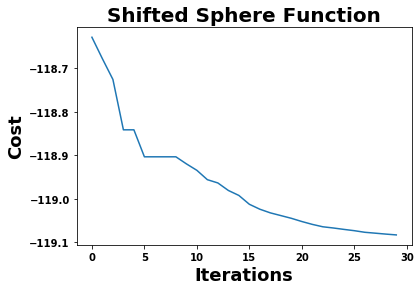

Computational time: 16.596 seconds


In [39]:
print ("The best fitness is: ", optimize[2])
print('Dimension = 50')
print('weight  = 0.5')
print('c1= 2')
print('c2= 1')

plt.plot(optimize[0])
plt.title("Shifted Sphere Function",fontsize=20,fontweight='bold')
plt.xlabel("Iterations",fontsize=18,fontweight='bold')
plt.ylabel("Cost",fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

print("Computational time: {:.3f} seconds".format(time.time()-start_time))

The best fitness is:  -118.58100874052272
Dimension = 500
weight  = 0.5
c1= 2
c2= 1


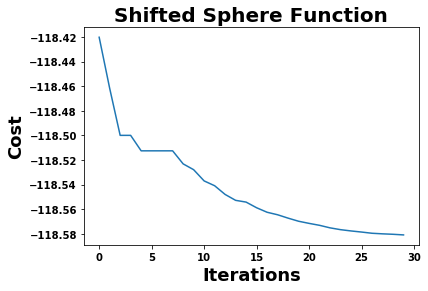

Computational time: 9.142 seconds


In [35]:
optimize = PSO(cost_function,initial,bounds,num_particles=15,maxiter=30)
print ("The best fitness is: ", optimize[2])
print('Dimension = 500')
print('weight  = 0.5')
print('c1= 2')
print('c2= 1')

plt.plot(optimize[0])
plt.title("Shifted Sphere Function",fontsize=20,fontweight='bold')
plt.xlabel("Iterations",fontsize=18,fontweight='bold')
plt.ylabel("Cost",fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

print("Computational time: {:.3f} seconds".format(time.time()-start_time))